<a href="https://colab.research.google.com/github/ankitg-02/sales_analysis/blob/main/corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score


In [2]:
#importing data from excelsheet
corporate_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(corporate_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
corporate_mod=data.groupby('Segment')
corporate_data=corporate_mod.get_group('Corporate')
corporate_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4997,4998,CA-2017-155824,2017-03-10,2017-03-15,Standard Class,KS-16300,Karen Seio,Corporate,United States,Raleigh,...,27604,South,OFF-BI-10000014,Office Supplies,Binders,Heavy-Duty E-Z-D Binders,13.092,4,0.7,-10.0372
311,312,CA-2016-142902,2016-09-12,2016-09-14,Second Class,BP-11185,Ben Peterman,Corporate,United States,Arvada,...,80004,West,FUR-FU-10001756,Furniture,Furnishings,"Eldon Expressions Desk Accessory, Wood Photo F...",15.232,1,0.2,1.7136
8195,8196,CA-2015-136700,2015-12-06,2015-12-11,Second Class,DB-13120,David Bremer,Corporate,United States,Santa Barbara,...,93101,West,OFF-PA-10004519,Office Supplies,Paper,Spiral Phone Message Books with Labels by Adams,8.960,2,0.0,4.3904
7014,7015,CA-2014-114790,2014-03-11,2014-03-13,Second Class,FM-14215,Filia McAdams,Corporate,United States,Richmond,...,40475,South,OFF-AP-10002578,Office Supplies,Appliances,"Fellowes Premier Superior Surge Suppressor, 10...",146.760,3,0.0,38.1576
9424,9425,CA-2014-145254,2014-07-23,2014-07-27,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,...,94122,West,TEC-AC-10002167,Technology,Accessories,Imation 8gb Micro Traveldrive Usb 2.0 Flash Drive,45.000,3,0.0,4.9500


In [4]:
corporate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2 to 9988
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3020 non-null   int64         
 1   Order ID       3020 non-null   object        
 2   Order Date     3020 non-null   datetime64[ns]
 3   Ship Date      3020 non-null   datetime64[ns]
 4   Ship Mode      3020 non-null   object        
 5   Customer ID    3020 non-null   object        
 6   Customer Name  3020 non-null   object        
 7   Segment        3020 non-null   object        
 8   Country        3020 non-null   object        
 9   City           3020 non-null   object        
 10  State          3020 non-null   object        
 11  Postal Code    3020 non-null   int64         
 12  Region         3020 non-null   object        
 13  Product ID     3020 non-null   object        
 14  Category       3020 non-null   object        
 15  Sub-Category   3020 non-nu

In [5]:
for i in corporate_data.columns:
  print(i,':','\t',corporate_data[i].isnull().sum())

Row ID : 	 0
Order ID : 	 0
Order Date : 	 0
Ship Date : 	 0
Ship Mode : 	 0
Customer ID : 	 0
Customer Name : 	 0
Segment : 	 0
Country : 	 0
City : 	 0
State : 	 0
Postal Code : 	 0
Region : 	 0
Product ID : 	 0
Category : 	 0
Sub-Category : 	 0
Product Name : 	 0
Sales : 	 0
Quantity : 	 0
Discount : 	 0
Profit : 	 0


In [6]:
for i in corporate_data.columns:
  print(i,':','\n',corporate_data[i].unique())

Row ID : 
 [   3   22   23 ... 9967 9988 9989]
Order ID : 
 ['CA-2016-138688' 'CA-2016-137330' 'CA-2016-117590' ... 'CA-2015-141593'
 'CA-2016-146374' 'CA-2017-163629']
Order Date : 
 <DatetimeArray>
['2016-06-12 00:00:00', '2016-12-09 00:00:00', '2016-12-08 00:00:00',
 '2017-09-10 00:00:00', '2016-07-17 00:00:00', '2017-09-19 00:00:00',
 '2016-03-11 00:00:00', '2016-12-11 00:00:00', '2014-12-05 00:00:00',
 '2017-12-09 00:00:00',
 ...
 '2014-06-10 00:00:00', '2014-08-20 00:00:00', '2017-03-16 00:00:00',
 '2014-02-14 00:00:00', '2015-06-08 00:00:00', '2016-05-02 00:00:00',
 '2014-04-03 00:00:00', '2015-09-13 00:00:00', '2016-06-03 00:00:00',
 '2014-03-02 00:00:00']
Length: 830, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-06-16 00:00:00', '2016-12-13 00:00:00', '2016-12-10 00:00:00',
 '2017-09-15 00:00:00', '2016-07-22 00:00:00', '2017-09-23 00:00:00',
 '2016-03-13 00:00:00', '2016-12-17 00:00:00', '2014-12-10 00:00:00',
 '2017-12-11 00:00:00',
 ...
 '2017-03-21 00:00:00',

In [7]:
corporate_data.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,3020.000000,3020,3020,3020,3020,3020,3020,3020,3020,3020,...,3020.000000,3020,3020,3020,3020,3020,3020.000000,3020.000000,3020.000000,3020.000000
unique,NaN,1514,NaN,NaN,4,236,236,1,1,340,...,NaN,4,1456,3,17,1444,NaN,NaN,NaN,NaN
top,NaN,CA-2017-157987,NaN,NaN,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,NaN,West,FUR-CH-10002880,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,1812,32,32,3020,3020,266,...,NaN,960,8,1820,473,18,NaN,NaN,NaN,NaN
mean,5134.017881,NaN,2016-04-27 17:31:52.052980224,2016-05-01 17:42:50.066225152,NaN,NaN,NaN,NaN,NaN,NaN,...,54482.228477,NaN,NaN,NaN,NaN,NaN,233.823300,3.843709,0.158228,30.456667
min,3.000000,NaN,2014-01-06 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-3839.990400
25%,2584.000000,NaN,2015-05-03 12:00:00,2015-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22153.000000,NaN,NaN,NaN,NaN,NaN,17.469000,2.000000,0.000000,1.928400
50%,5340.500000,NaN,2016-07-02 00:00:00,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,53209.000000,NaN,NaN,NaN,NaN,NaN,56.540000,3.000000,0.200000,8.694000
75%,7646.500000,NaN,2017-05-13 00:00:00,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,212.895000,5.000000,0.200000,29.843500
max,9989.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


**Details about Corporate category**

In [8]:
corporate_data['Category'].value_counts()

,count
Category,
Office Supplies,1820
Furniture,646
Technology,554


**Exploratory Data Analysis**

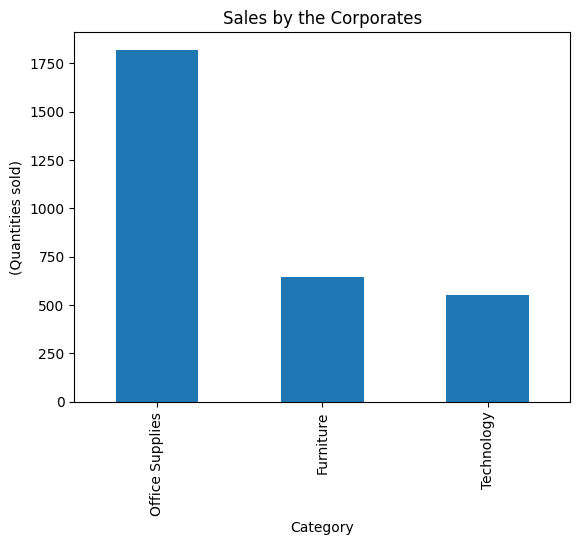

In [9]:
#sales of category items under Corporate segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
corporate_data['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Corporates")
plt.show()

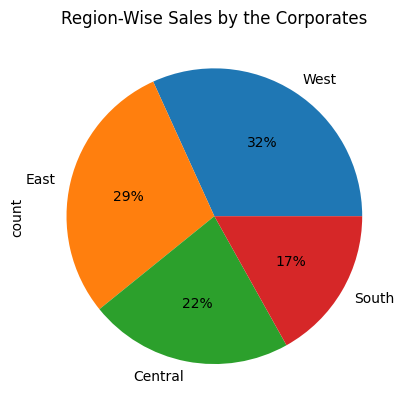

In [10]:
#distirbution of sales pattern about the region by the Corporate category
corporate_data['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

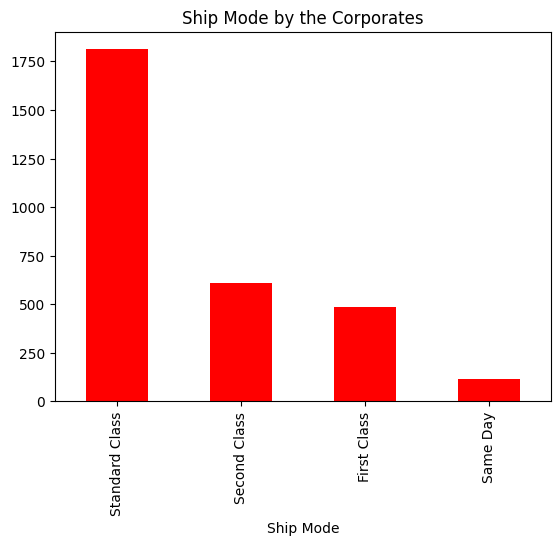

In [11]:
#Shipping mode of items ordered by Corporate segment
corporate_data['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

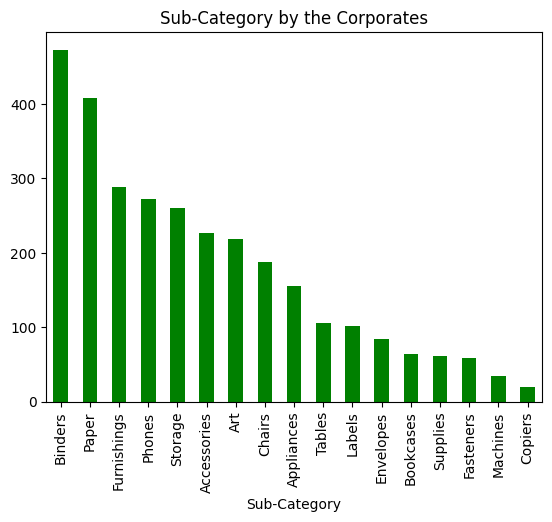

In [12]:
#sub-category items ordered by the Corporate segment
corporate_data['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

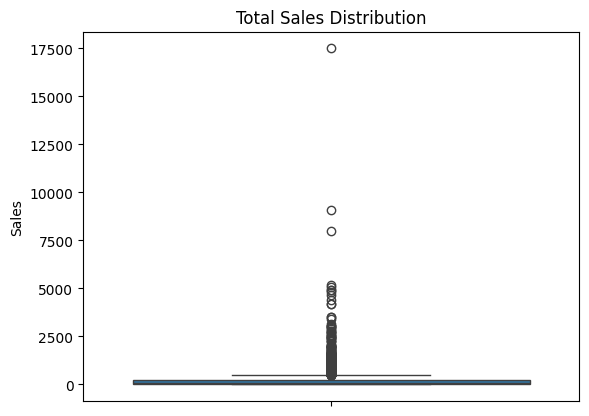

In [13]:
#sales pattern distribution
sns.boxplot(corporate_data['Sales'])
plt.title("Total Sales Distribution")
plt.show()

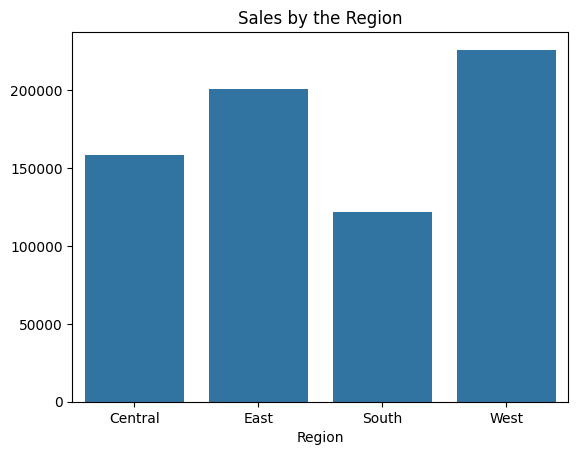

In [14]:
#sales distribution pattern region-wise
sales_region=corporate_data.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

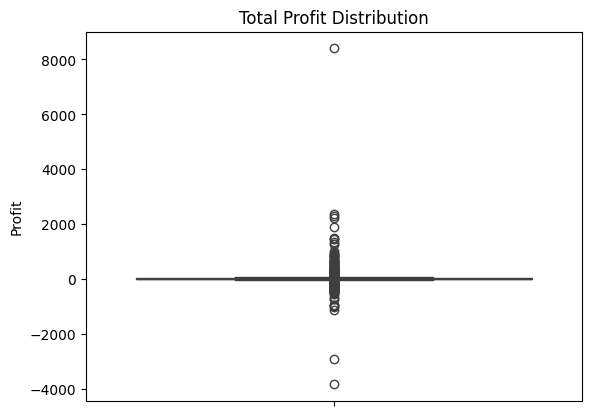

In [15]:
#profit pattern distribution
sns.boxplot(corporate_data['Profit'])
plt.title("Total Profit Distribution")
plt.show()

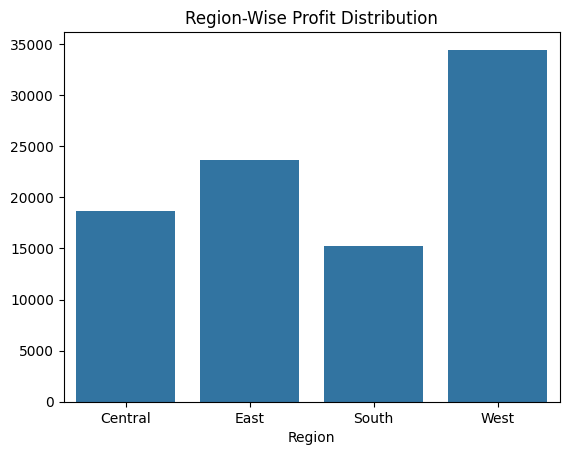

In [16]:
#profit pattern distribution
profit_by_region=corporate_data.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

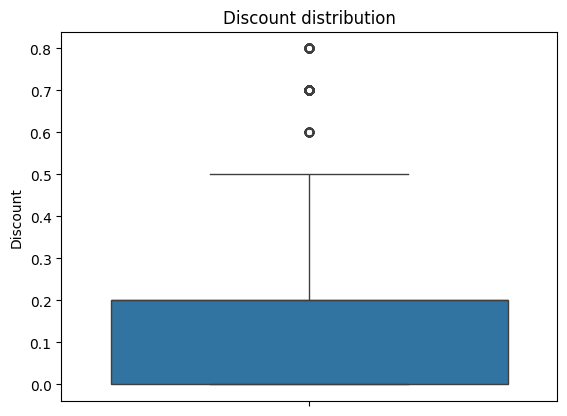

In [17]:
#discount pattern distribution
sns.boxplot(corporate_data['Discount'])
plt.title("Discount distribution")
plt.show()

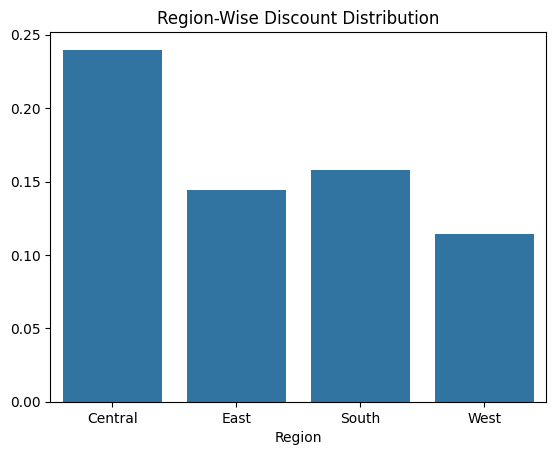

In [18]:
#discount pattern distribution
discount_by_region=corporate_data.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

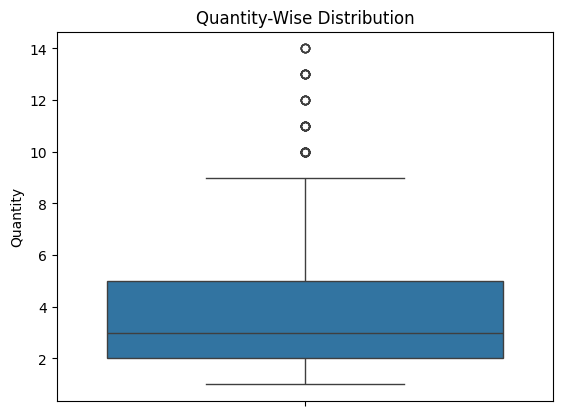

In [19]:
#quantity pattern distribution
sns.boxplot(corporate_data['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

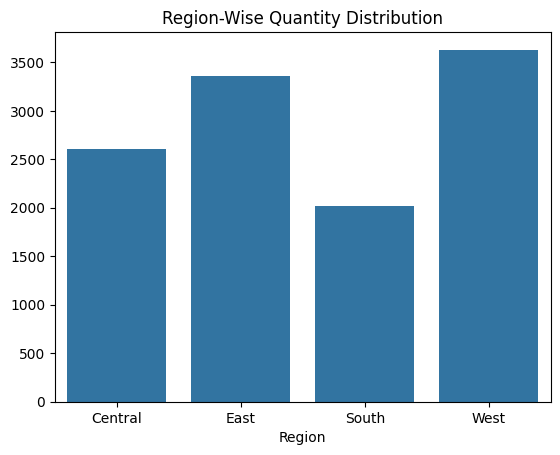

In [20]:
#quantity pattern distribution
quantity_by_region=corporate_data.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [21]:
oe=OrdinalEncoder()
corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
corporate_data['City']=oe.fit_transform(corporate_data[['City']])
corporate_data['State']=oe.fit_transform(corporate_data[['State']])
corporate_data['Region']=oe.fit_transform(corporate_data[['Region']])
corporate_data['Category']=oe.fit_transform(corporate_data[['Category']])
corporate_data['Sub-Category']=oe.fit_transform(corporate_data[['Sub-Category']])
corporate_data['Segment']=oe.fit_transform(corporate_data[['Segment']])
corporate_data['Country']=oe.fit_transform(corporate_data[['Country']])

<ipython-input-21-80ffab47515d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
<ipython-input-21-80ffab47515d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['City']=oe.fit_transform(corporate_data[['City']])
<ipython-input-21-80ffab47515d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [22]:
corporate_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,2.0,DV-13045,Darrin Van Huff,0.0,0.0,168.0,...,90036,3.0,OFF-LA-10000240,1.0,10.0,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
21,22,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AR-10000246,1.0,2.0,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AP-10001492,1.0,1.0,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884
35,36,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,TEC-PH-10004977,2.0,13.0,GE 30524EE4,1097.544,7,0.2,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,FUR-FU-10003664,0.0,9.0,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


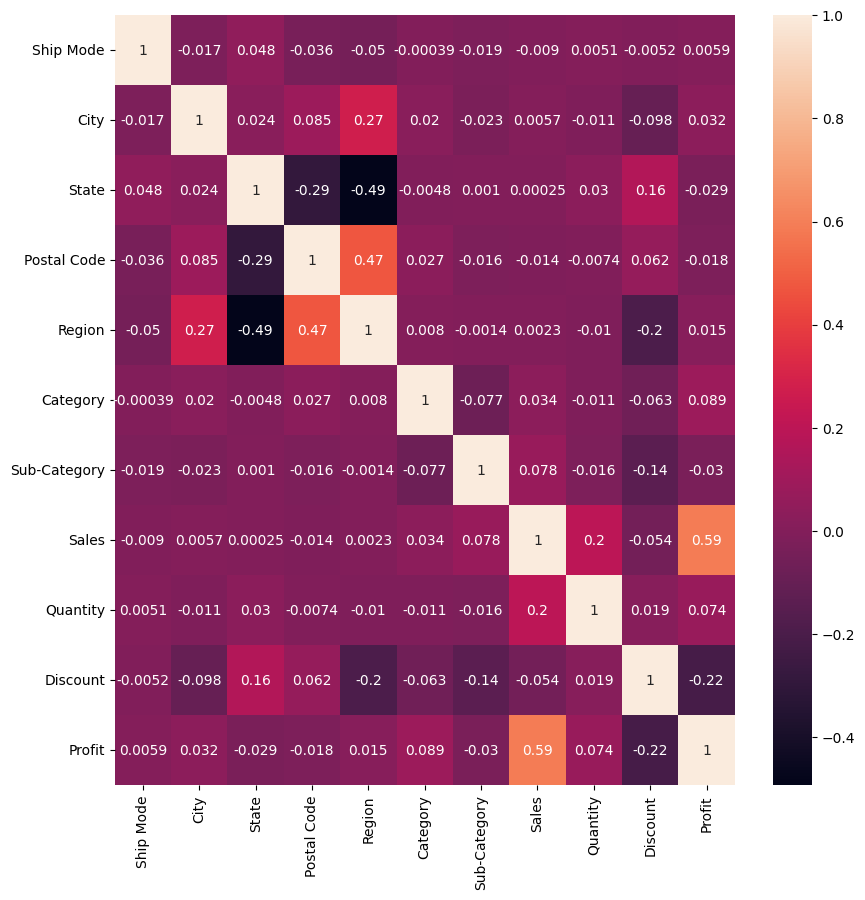

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [24]:
mod_corporate_data=pd.DataFrame(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
mod_corporate_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,2.0,168.0,3.0,90036,3.0,1.0,10.0,14.620,2,0.0,6.8714
21,3.0,106.0,24.0,68025,0.0,1.0,2.0,19.460,7,0.0,5.0596
22,3.0,106.0,24.0,68025,0.0,1.0,1.0,60.340,7,0.0,15.6884
35,0.0,262.0,39.0,75080,0.0,2.0,13.0,1097.544,7,0.2,123.4737
36,0.0,262.0,39.0,75080,0.0,0.0,9.0,190.920,5,0.6,-147.9630


In [25]:
for i in mod_corporate_data.columns:
  print(i,':','\t',mod_corporate_data[i].isnull().sum())
  print("\n")
  print(i,':','\n',mod_corporate_data[i].unique())
  print("\n")
  print("\n")

Ship Mode : 	 0


Ship Mode : 
 [2. 3. 0. 1.]




City : 	 0


City : 
 [168. 106. 262. 205. 183.  88. 209. 110. 133.  77.  87. 275.  37.  65.
 237. 282. 104. 283.  57. 112. 256.  75. 182.  83.  53. 288. 232.  52.
  59. 137. 304.  63.  25. 306.  11. 120. 276. 165. 127. 204. 174. 251.
 235. 326. 331. 290. 263. 157.  46. 280.   0. 213.   4. 162. 231. 316.
   5.  76. 325. 193. 291. 320.  43.  60.  49. 203. 128. 281. 141. 115.
  14.  33.  82.  64. 265. 198. 192. 305. 103. 161. 278. 298. 153.  16.
  99. 264. 313. 322. 312. 218.   7. 147.  74. 260.  70.  81. 117. 169.
 173.  98.  80. 216.  10.  17. 187. 196. 208. 139. 243. 210. 189.  36.
 328.  26. 114.  84. 293. 215.  86. 100.  20. 143. 317.  18. 269.  34.
 126. 134. 136.   8. 255.  48. 200.  35.  55. 159. 152. 236. 253. 188.
 302. 337. 279. 160.  21. 190. 292. 101. 135.   1. 296.  62. 330. 163.
 148. 289. 121. 301.  47. 274. 249. 171. 132. 244. 315.  71. 222. 258.
 335. 230. 129. 219.  30. 118. 248. 151. 176. 303. 334. 195. 107. 234.
 307.

In [26]:
for i in mod_corporate_data.columns[7:11]:
  print(i,':\n')
  q1=mod_corporate_data[i].quantile(0.25)
  q3=mod_corporate_data[i].quantile(0.75)
  iqr=q3-q1
  upper_bound=q3+1.5*iqr
  lower_bound=q1-1.5*iqr
  print(f'upper limit of {i}:',upper_bound)
  print(f'lower limit of {i}:',lower_bound)
  print("\n")

Sales :

upper limit of Sales: 506.034
lower limit of Sales: -275.67


Quantity :

upper limit of Quantity: 9.5
lower limit of Quantity: -2.5


Discount :

upper limit of Discount: 0.5
lower limit of Discount: -0.30000000000000004


Profit :

upper limit of Profit: 71.71615
lower limit of Profit: -39.94425




In [27]:
mod_corporate_data=mod_corporate_data[
    (mod_corporate_data['Sales']>=0) & (mod_corporate_data['Sales']<=506.034) &
    (mod_corporate_data['Quantity']>=0) & (mod_corporate_data['Quantity']<=9.5) &
    (mod_corporate_data['Discount']>=0) & (mod_corporate_data['Discount']<=0.5) &
    (mod_corporate_data['Profit']>=-39.94425) & (mod_corporate_data['Profit']<=71.71615) ]

In [28]:
#splitting the dataset
x=mod_corporate_data.drop(columns=['Sales'],axis='1')
y=mod_corporate_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.5,random_state=4)

**Predictive Models**

In [29]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor(max_features=200)
model_4 = GradientBoostingRegressor()
model_5 = AdaBoostRegressor()
model_6 = DecisionTreeRegressor(max_depth=2)
model_7 = KNeighborsRegressor()
model_8 = SVR()
model_9=Ridge()
model_10=Lasso()

In [30]:
model_1.fit(x_train, y_train)
model_2.fit(x_train, y_train)
model_3.fit(x_train, y_train)
model_4.fit(x_train, y_train)
model_5.fit(x_train, y_train)
model_6.fit(x_train, y_train)
model_7.fit(x_train, y_train)
model_8.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_10.fit(x_train, y_train)

Lasso()

In [31]:
pred_1 = model_1.predict(x_test)
pred_2 = model_2.predict(x_test)
pred_3 = model_3.predict(x_test)
pred_4=model_4.predict(x_test)
pred_5=model_5.predict(x_test)
pred_6=model_6.predict(x_test)
pred_7=model_7.predict(x_test)
pred_8=model_8.predict(x_test)
pred_9=model_9.predict(x_test)
pred_10=model_10.predict(x_test)

In [32]:
pred1 = model_1.predict(x_val)
pred2 = model_2.predict(x_val)
pred3 = model_3.predict(x_val)
pred4=model_4.predict(x_val)
pred5=model_5.predict(x_val)
pred6=model_6.predict(x_val)
pred7=model_7.predict(x_val)
pred8=model_8.predict(x_val)
pred9=model_9.predict(x_val)
pred10=model_10.predict(x_val)

**Predictive Model's Performance**

test set for model1
Performance of Model 1:

Mean Squared Error: 6193.515748166974 

Root Mean Squared Error: 78.6988929284712 

Mean Absolute Error: 50.87182418369934 

Explained Variance Score: 0.24957781905103538 

R2 Score: 0.24248534531272425 





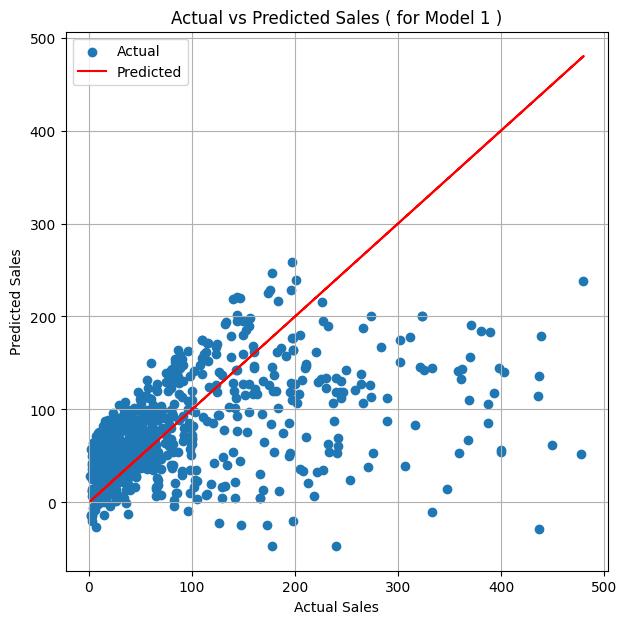



validation set for model1
Performance of Model 1:

Mean Squared Error: 7974.885546377383 

Root Mean Squared Error: 89.30221467789801 

Mean Absolute Error: 54.592963644767615 

Explained Variance Score: 0.13133062835622245 

R2 Score: 0.11641437808197763 





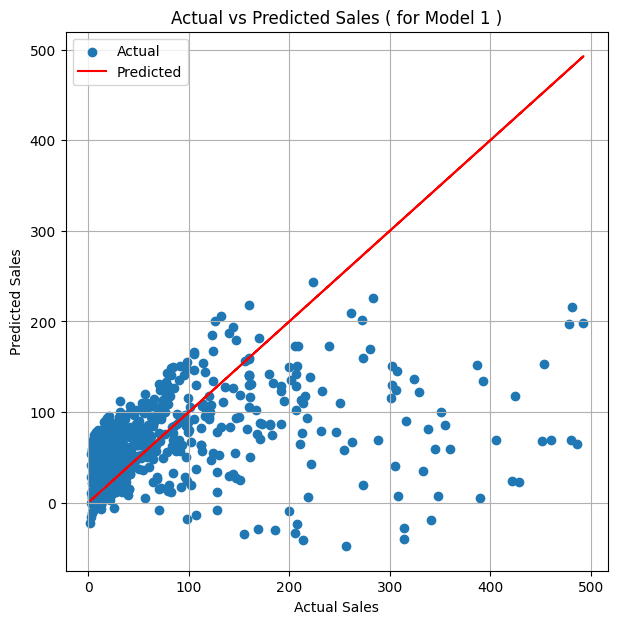

test set for model2
Performance of Model 2:

Mean Squared Error: 3870.3370779507036 

Root Mean Squared Error: 62.2120332246962 

Mean Absolute Error: 33.21511661621834 

Explained Variance Score: 0.5268665656628854 

R2 Score: 0.5266279808855108 





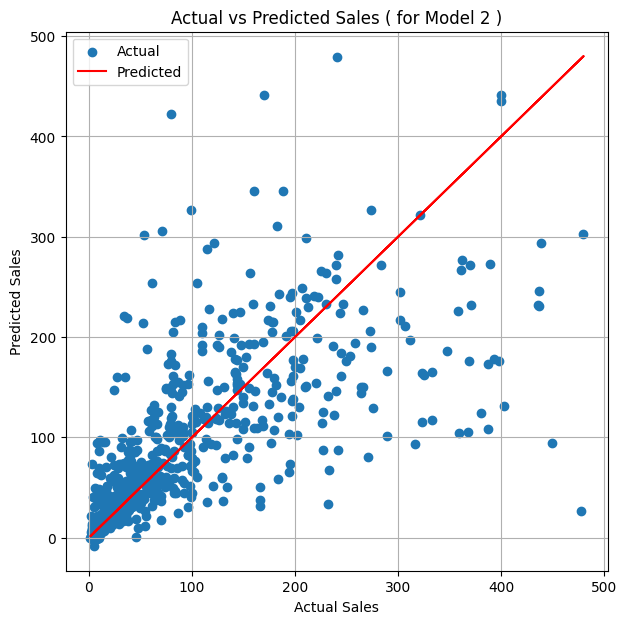



validation set for model2
Performance of Model 2:

Mean Squared Error: 4465.2781045161855 

Root Mean Squared Error: 66.82273643391287 

Mean Absolute Error: 35.12029441816455 

Explained Variance Score: 0.5069252164291265 

R2 Score: 0.50526493351267 





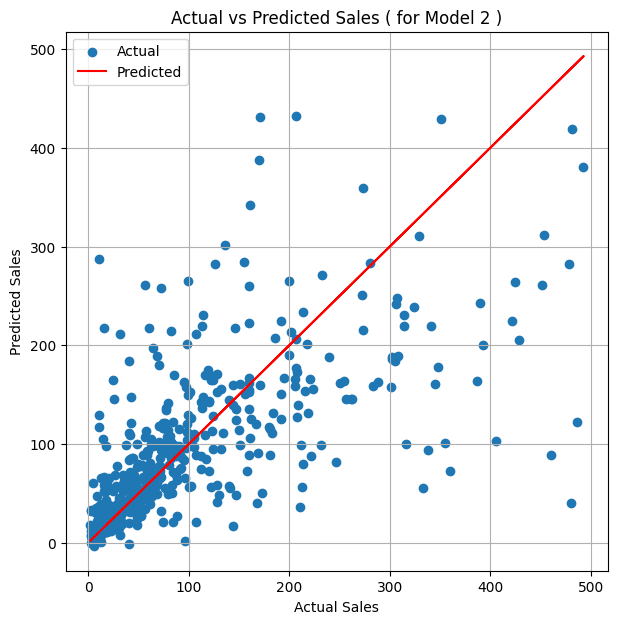

test set for model3
Performance of Model 3:

Mean Squared Error: 3384.595954235856 

Root Mean Squared Error: 58.17728039566525 

Mean Absolute Error: 30.90521827537923 

Explained Variance Score: 0.5863381474632587 

R2 Score: 0.5860378596296087 





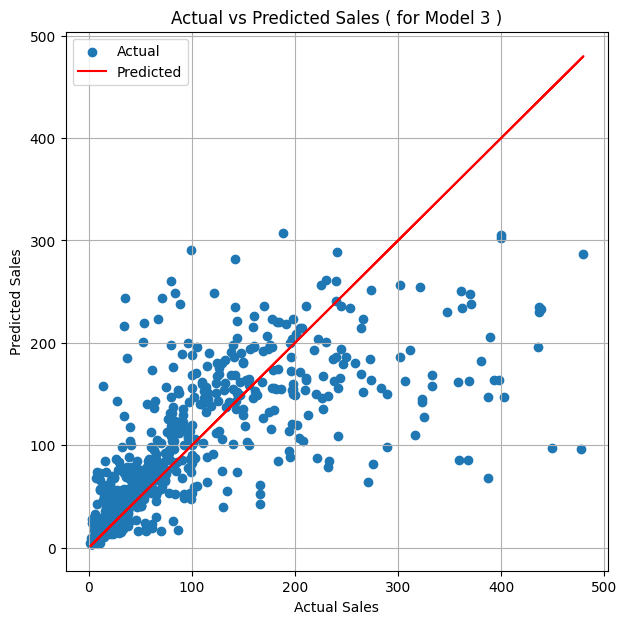



validation set for model3
Performance of Model 3:

Mean Squared Error: 4080.9152245091545 

Root Mean Squared Error: 63.88204148670544 

Mean Absolute Error: 33.44415404043546 

Explained Variance Score: 0.5495917968312511 

R2 Score: 0.547850812946073 





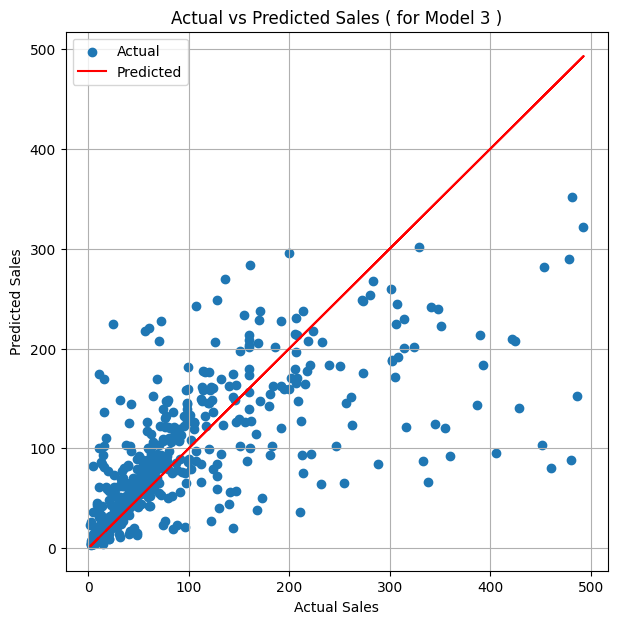

test set for model4
Performance of Model 4:

Mean Squared Error: 3274.0115295412024 

Root Mean Squared Error: 57.21897875304314 

Mean Absolute Error: 30.723695551502768 

Explained Variance Score: 0.6022979548632785 

R2 Score: 0.5995631860665609 





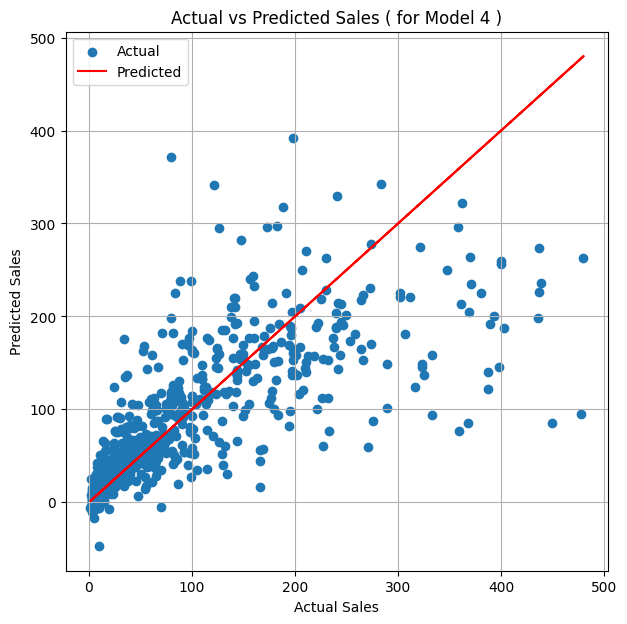



validation set for model4
Performance of Model 4:

Mean Squared Error: 4057.1494548410246 

Root Mean Squared Error: 63.69575696104902 

Mean Absolute Error: 33.09233657375084 

Explained Variance Score: 0.551670276865645 

R2 Score: 0.5504839657669449 





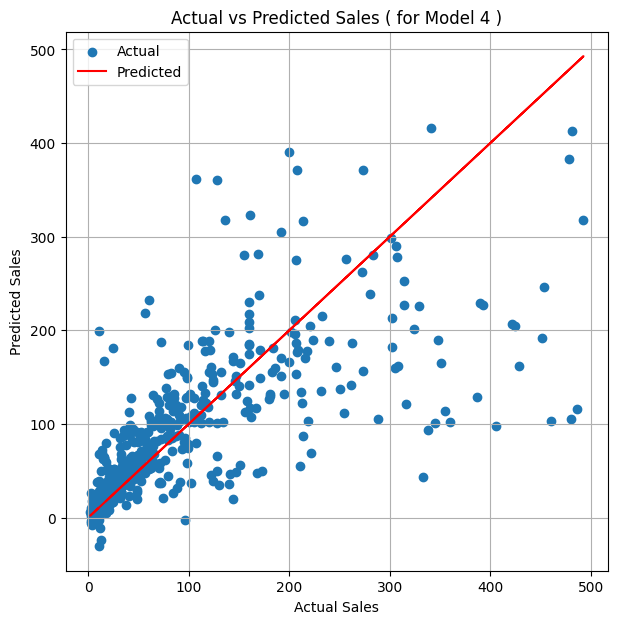

test set for model5
Performance of Model 5:

Mean Squared Error: 7058.208542732539 

Root Mean Squared Error: 84.01314505916642 

Mean Absolute Error: 74.95397088401143 

Explained Variance Score: 0.4705685055892189 

R2 Score: 0.13672675999229966 





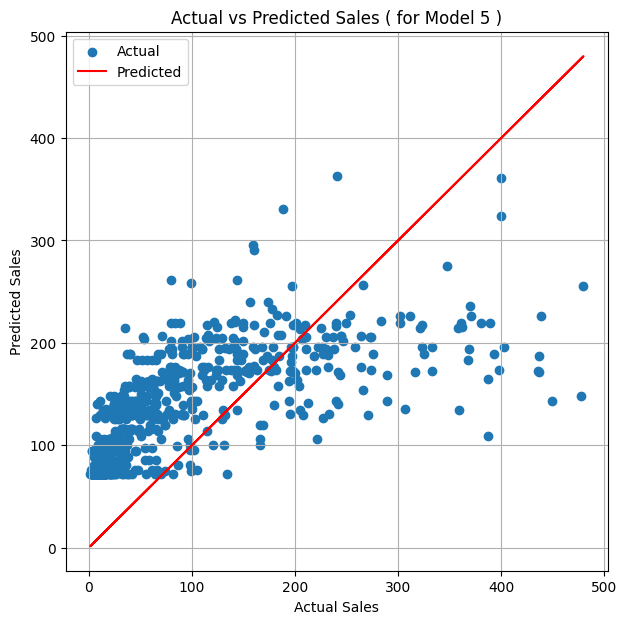



validation set for model5
Performance of Model 5:

Mean Squared Error: 7758.154038468791 

Root Mean Squared Error: 88.08038395958995 

Mean Absolute Error: 77.5202820551423 

Explained Variance Score: 0.4297628002009717 

R2 Score: 0.1404273677469684 





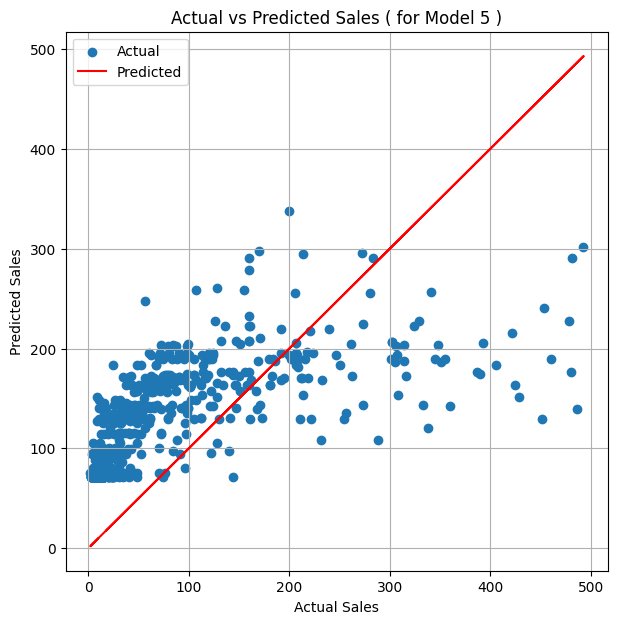

test set for model6
Performance of Model 6:

Mean Squared Error: 6122.754019111501 

Root Mean Squared Error: 78.24802885128481 

Mean Absolute Error: 49.52149900432763 

Explained Variance Score: 0.2543785541885647 

R2 Score: 0.2511400495114493 





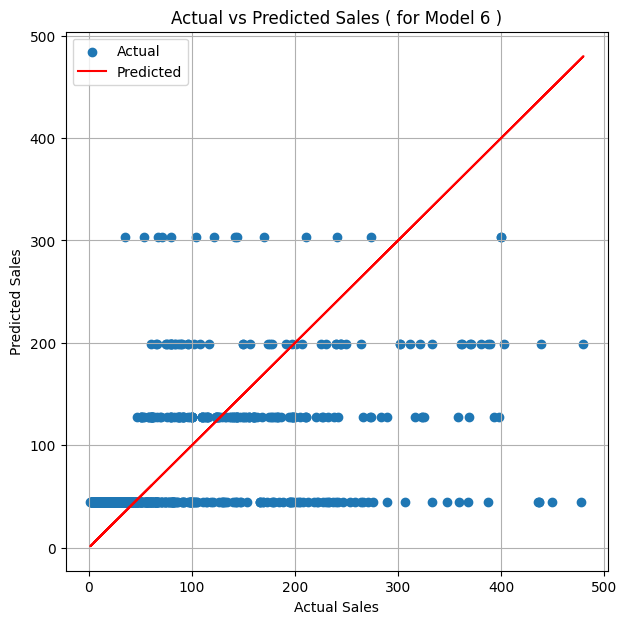



validation set for model6
Performance of Model 6:

Mean Squared Error: 7823.49023508004 

Root Mean Squared Error: 88.45049595723044 

Mean Absolute Error: 54.28500221108293 

Explained Variance Score: 0.13917793704291714 

R2 Score: 0.13318837684474383 





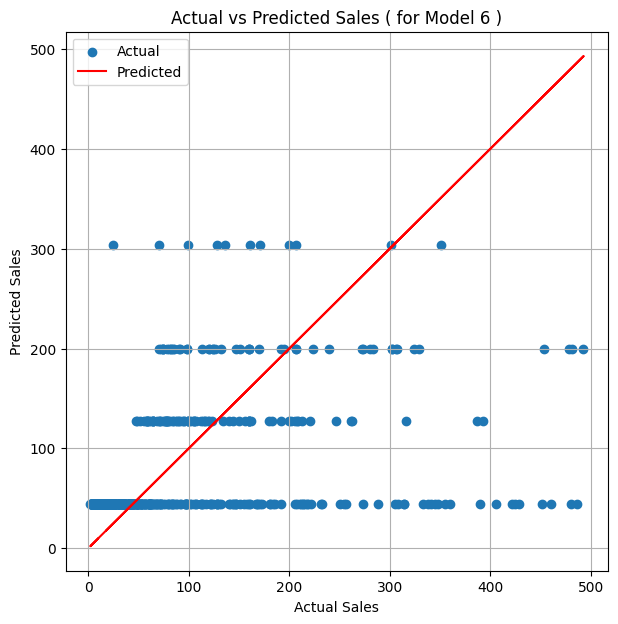

test set for model7
Performance of Model 7:

Mean Squared Error: 7755.2831815926265 

Root Mean Squared Error: 88.06408565126095 

Mean Absolute Error: 57.776548424737456 

Explained Variance Score: 0.07236650097444008 

R2 Score: 0.051469165466341504 





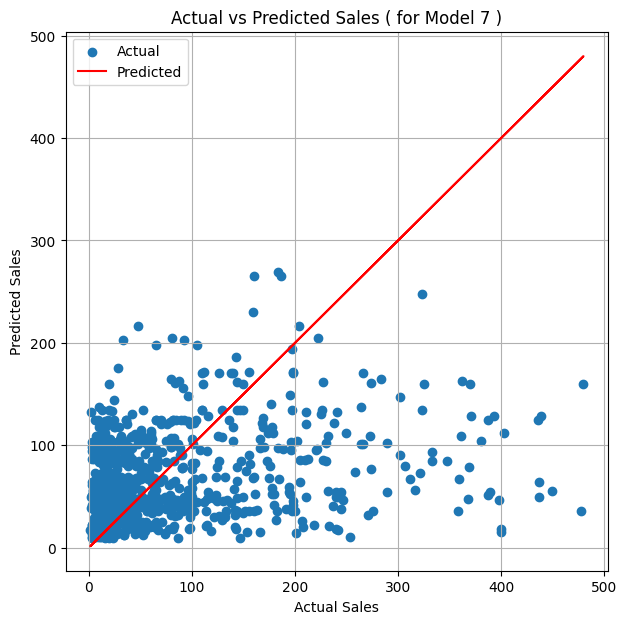



validation set for model7
Performance of Model 7:

Mean Squared Error: 9201.327196343884 

Root Mean Squared Error: 95.92354870595585 

Mean Absolute Error: 62.351874587869354 

Explained Variance Score: 0.01154952988227509 

R2 Score: -0.019470482174615666 





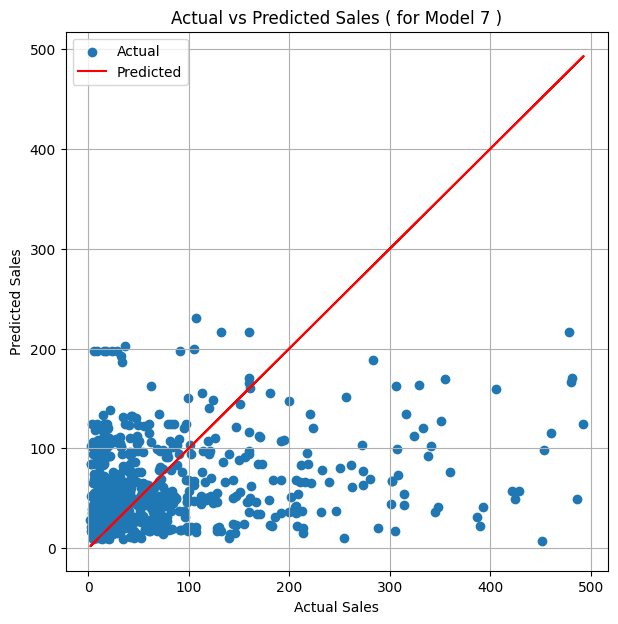

test set for model8
Performance of Model 8:

Mean Squared Error: 9808.960115943044 

Root Mean Squared Error: 99.04019444620978 

Mean Absolute Error: 59.65355840853181 

Explained Variance Score: 0.00251269031494461 

R2 Score: -0.19971133314207812 





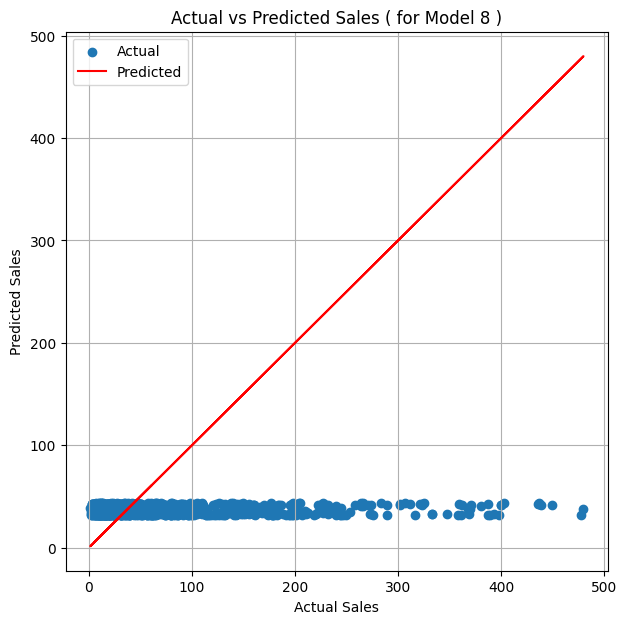



validation set for model8
Performance of Model 8:

Mean Squared Error: 10672.99967382741 

Root Mean Squared Error: 103.31021088850515 

Mean Absolute Error: 60.71828133127955 

Explained Variance Score: 0.005431721069676598 

R2 Score: -0.1825259434367028 





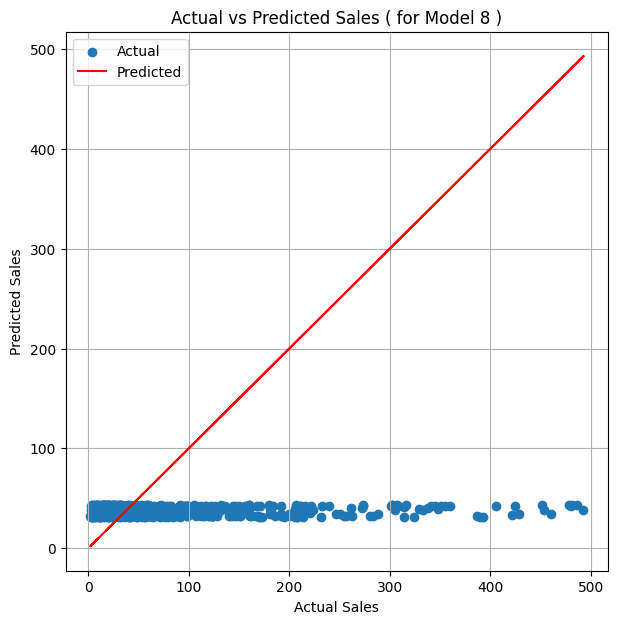

test set for model9
Performance of Model 9:

Mean Squared Error: 6201.537893619038 

Root Mean Squared Error: 78.74984376885479 

Mean Absolute Error: 50.922710472043335 

Explained Variance Score: 0.24820246146349456 

R2 Score: 0.24150417516816292 





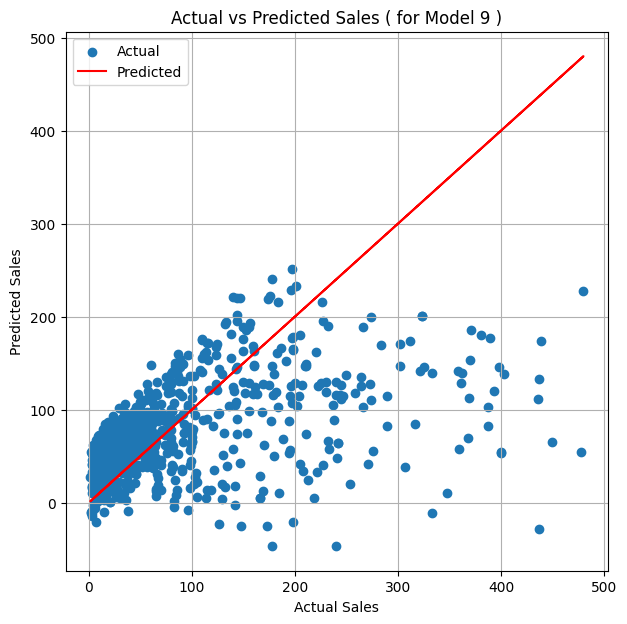



validation set for model9
Performance of Model 9:

Mean Squared Error: 7987.370758496465 

Root Mean Squared Error: 89.37209160860266 

Mean Absolute Error: 54.57826239322553 

Explained Variance Score: 0.12990792772662985 

R2 Score: 0.11503106620234471 





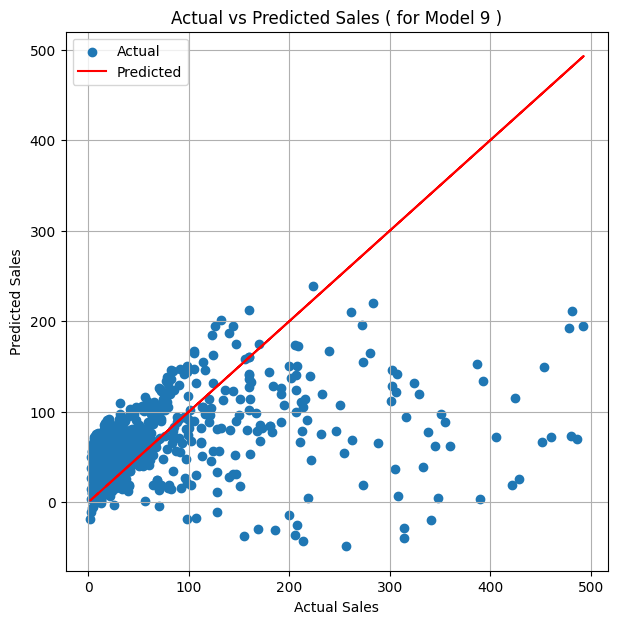

test set for model10
Performance of Model 10:

Mean Squared Error: 6305.7869473729825 

Root Mean Squared Error: 79.40898530627993 

Mean Absolute Error: 51.18936668648682 

Explained Variance Score: 0.23475596669612142 

R2 Score: 0.22875371336797035 





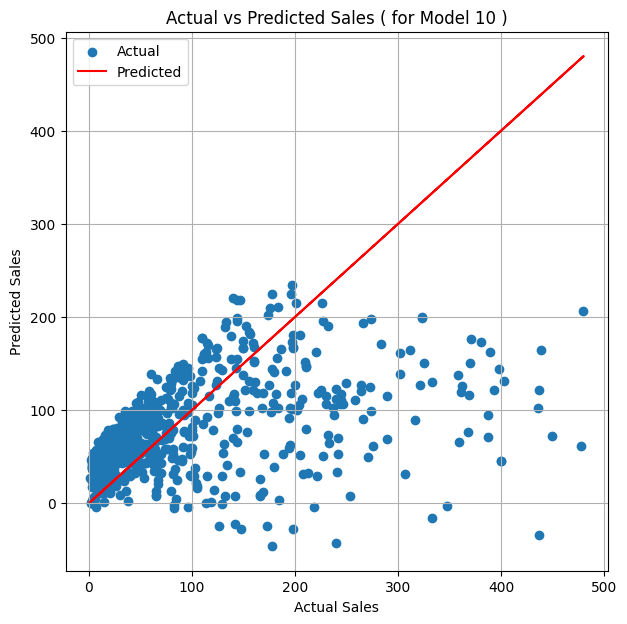



validation set for model10
Performance of Model 10:

Mean Squared Error: 8121.541782233155 

Root Mean Squared Error: 90.1195971042545 

Mean Absolute Error: 55.08553402312887 

Explained Variance Score: 0.11509455384020606 

R2 Score: 0.10016545004242217 





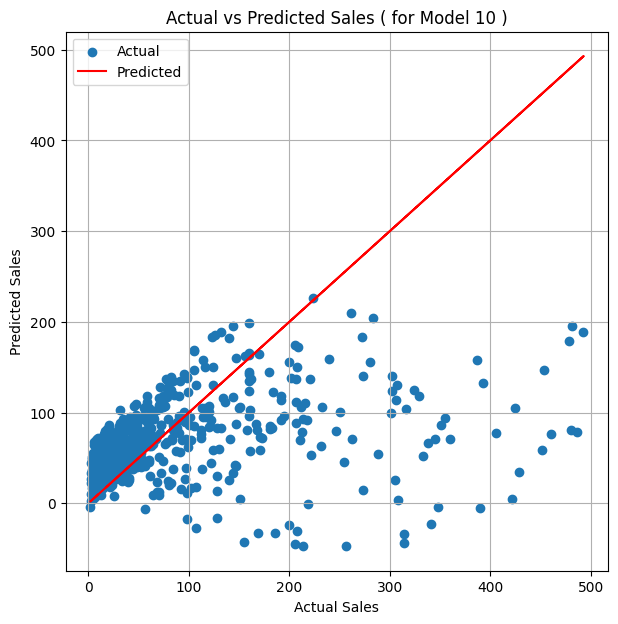

In [33]:
j=1
for i,k in zip([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10],
               [pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10]):
  print(f'test set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_test, i),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, i)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_test, i),"\n")
  print("Explained Variance Score:", explained_variance_score(y_test, i),"\n")
  print("R2 Score:", r2_score(y_test, i),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_test,i)
  plt.plot(y_test,y_test,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  print("\n")
  print(f'validation set for model{j}')
  print(f"Performance of Model {j}:\n")
  print("Mean Squared Error:", mean_squared_error(y_val, k),"\n")
  print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, k)),"\n")
  print("Mean Absolute Error:", mean_absolute_error(y_val, k),"\n")
  print("Explained Variance Score:", explained_variance_score(y_val, k),"\n")
  print("R2 Score:", r2_score(y_val, k),"\n")
  print("\n")
  plt.figure(figsize=(7,7))
  plt.scatter(y_val,k)
  plt.plot(y_val,y_val,'r')
  plt.xlabel("Actual Sales")
  plt.ylabel(f"Predicted Sales")
  plt.legend(['Actual','Predicted'])
  plt.title(f"Actual vs Predicted Sales ( for Model {j} )")
  plt.grid(True)
  plt.show()
  j+=1

Mean Squared Error: 4306.092207793008
Root Mean Squared Error: 65.62082145015412
Mean Absolute Error: 41.587409352933534
Explained Variance Score: 0.47494760448715945
R2 Score: 0.4733317739922941




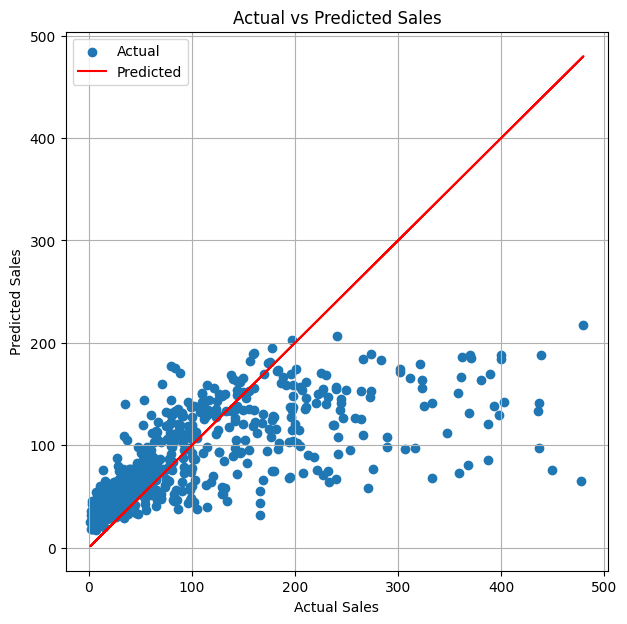

In [34]:
pred_final = np.mean([pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9,pred_10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_test, pred_final))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, pred_final)))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_final))
print("Explained Variance Score:", explained_variance_score(y_test, pred_final))
print("R2 Score:", r2_score(y_test, pred_final))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_test,pred_final)
plt.plot(y_test,y_test,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()

Mean Squared Error: 5401.971888057594
Root Mean Squared Error: 73.49810805767447
Mean Absolute Error: 44.58368954549542
Explained Variance Score: 0.40548179062078815
R2 Score: 0.40148298523716874




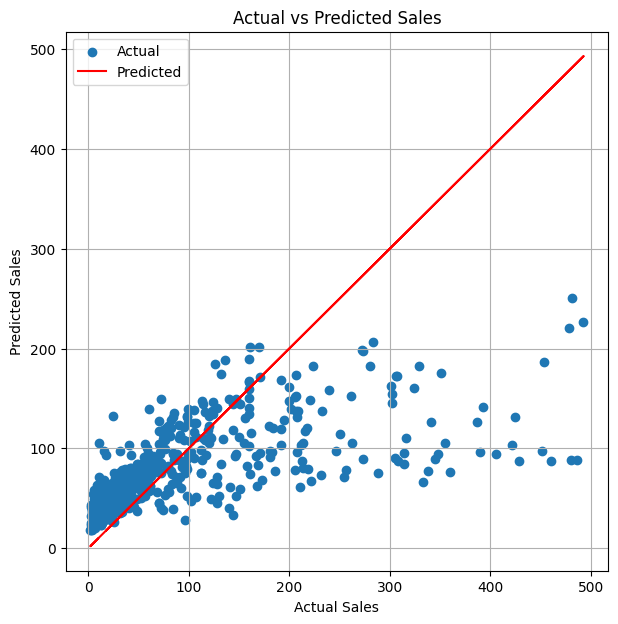

In [35]:
pred_final1 = np.mean([pred1,pred2,pred3,pred4,pred5,pred6,pred7,pred8,pred9,pred10], axis=0)
print("Mean Squared Error:", mean_squared_error(y_val, pred_final1))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_val, pred_final1)))
print("Mean Absolute Error:", mean_absolute_error(y_val, pred_final1))
print("Explained Variance Score:", explained_variance_score(y_val, pred_final1))
print("R2 Score:", r2_score(y_val, pred_final1))
print('\n')
plt.figure(figsize=(7,7))
plt.scatter(y_val,pred_final1)
plt.plot(y_val,y_val,'r')
plt.legend(['Actual','Predicted'])
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend(['Actual','Predicted'])
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
